In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd 'gdrive/My Drive/mldatasets'

[Errno 2] No such file or directory: 'gdrive/My Drive/mldatasets'
/content/gdrive/My Drive/mldatasets


In [ ]:
ls

Auto.csv  Boston.csv  Default.csv  Hitters.csv  Wage.csv


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import copy 

In [ ]:
data = pd.read_csv('Boston.csv')

In [ ]:
data.shape

(506, 14)

In [ ]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [ ]:
data.corr()['medv']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
black      0.333461
lstat     -0.737663
medv       1.000000
Name: medv, dtype: float64

### Observation:
### --> Most of them have a correlation of around +-0.5 with the target variable

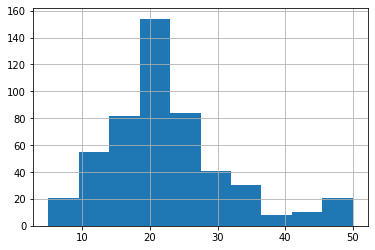

In [ ]:
data['medv'].hist()

In [ ]:
((data['medv']>=(data['medv'].mean() - 3 * data['medv'].std())) \
                          & (data['medv']<=(data['medv'].mean() + 3 * data['medv'].std()))).sum()

506

In [ ]:
X = data.drop('medv',axis = 1)
y = data['medv']

# Check multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

vif

,VIF Factor,features
0,2.100373,crim
1,2.844013,zn
2,14.485758,indus
3,1.152952,chas
4,73.894947,nox
5,77.948283,rm
6,21.386850,age
7,14.699652,dis
8,15.167725,rad
9,61.227274,tax


In [ ]:
X_drop_1 = X.drop(['nox','rm','tax','ptratio','age','black'],axis = 1)

In [ ]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_drop_1.values, i) for i in range(X_drop_1.shape[1])]
vif["features"] = X_drop_1.columns

vif

,VIF Factor,features
0,2.067135,crim
1,2.299351,zn
2,6.900077,indus
3,1.086574,chas
4,3.968908,dis
5,4.678181,rad
6,6.726973,lstat


### --> Multi-collinearity is required from statistical point of view but not from accuracy point of view.
### --> We will ignore handling multi-collinearity for now


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 1, test_size = 0.3)#random_state = 3

In [ ]:
X_train.shape

(354, 13)

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(y_train,X_train)
regr = model.fit()

In [ ]:
regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   medv   R-squared (uncentered):                   0.953
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              533.5
Date:                Sun, 07 Jun 2020   Prob (F-statistic):                   1.33e-217
Time:                        16:02:42   Log-Likelihood:                         -1086.9
No. Observations:                 354   AIC:                                      2200.
Df Residuals:                     341   BIC:                                      2250.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
crim          -0.0580      0.046     -1.249      0.212      -0.149       0.033
zn             0.0638      0.020      3.206      0.001       0.025       0.103
indus          0.0170      0.082      0.207      0.836      -0.145       0.179
chas           2.4502      1.053      2.327      0.021       0.379       4.521
nox           -2.4039      4.190     -0.574      0.567     -10.645       5.838
rm             5.4680      0.398     13.734      0.000       4.685       6.251
age           -0.0034      0.018     -0.192      0.848      -0.038       0.031
dis           -0.9176      0.262     -3.504      0.001      -1.433      -0.402
rad            0.1285      0.089      1.442      0.150      -0.047       0.304
tax           -0.0084      0.005     -1.589      0.113      -0.019       0.002
ptratio       -0.2524      0.147     -1.721      0.086      -0.541       0.036
black          0.0137      0.004      3.902      0.000       0.007       0.021
lstat         -0.4488      0.064     -7.005      0.000      -0.575      -0.323
==============================================================================
Omnibus:                      150.114   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              914.019
Skew:                           1.671   Prob(JB):                    3.34e-199
Kurtosis:                      10.127   Cond. No.                     8.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

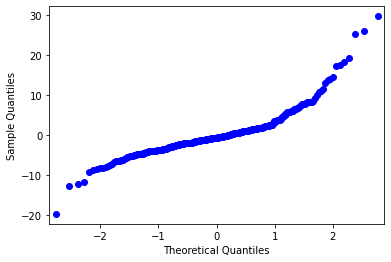

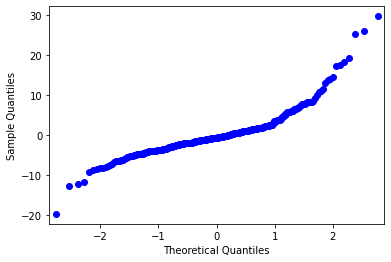

In [ ]:
#qqpolot vs. normal distribution
sm.qqplot(regr.resid)

### --> Normality of errors is also required from statistical inference point of view

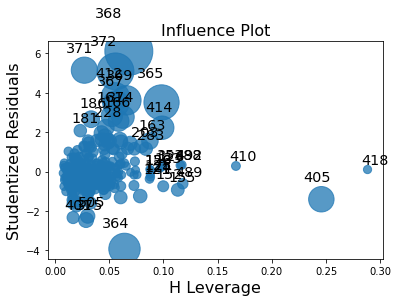

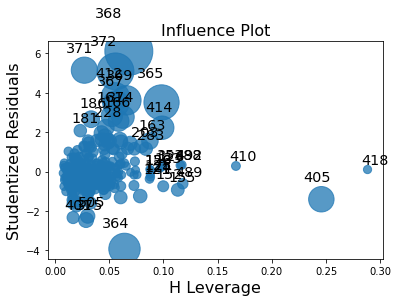

In [ ]:
#graphical representation of the influences()
sm.graphics.influence_plot(regr)

### --> There are quite a few influence points

# Influence points based on outlier criteria

In [ ]:
regr.outlier_test()

,student_resid,unadj_p,bonf(p)
13,-0.149537,0.881219,1.000000
61,-0.579103,0.562903,1.000000
377,-1.661144,0.097606,1.000000
39,-0.228390,0.819480,1.000000
365,3.510107,0.000508,0.179922
...,...,...,...
255,-0.296639,0.766923,1.000000
72,-0.128088,0.898155,1.000000
396,-1.543665,0.123600,1.000000
235,0.200887,0.840907,1.000000


In [ ]:
(regr.outlier_test()['student_resid'] > 3).sum()

7

In [ ]:
(regr.outlier_test()['student_resid'] < -3).sum()

1

In [ ]:
outlier_upp = regr.outlier_test()['student_resid'] > 3

In [ ]:
outlier_low = regr.outlier_test()['student_resid'] < -3

In [ ]:
outlier = np.logical_or(outlier_low, outlier_upp)

# Influence points based on Leverage Statistic

In [ ]:
infl = regr.get_influence()
infl

In [ ]:
leviers = infl.hat_matrix_diag #leverage
leviers[:10]

array([0.01847059, 0.04192081, 0.02280836, 0.05268661, 0.09828881,
       0.01467437, 0.04271852, 0.04120421, 0.03870031, 0.06412632])

In [ ]:
high_lev = leviers>0.08

In [ ]:
influ_pts = np.logical_or(outlier, high_lev)

In [ ]:
influ_index = X_train.index[influ_pts]

In [ ]:
X_train = X_train.drop(influ_index)

In [ ]:
y_train = y_train.drop(influ_index)

In [ ]:
y_train.head()

13     20.4
61     16.0
377    13.3
39     30.8
272    24.4
Name: medv, dtype: float64

# ((((((

In [ ]:
# import statsmodels.api as sm

# from statsmodels.gam.api import GLMGam, BSplines

# # import data
# # from statsmodels.gam.tests.test_penalized import df_autos

In [ ]:
# house_train = pd.concat([X_train,y_train],axis = 1)

In [ ]:
# house_train.head()

In [ ]:
# house_train.shape

In [ ]:
# house_train.columns

In [ ]:
# # create spline basis for weight and hp
# x_spline = copy.deepcopy(X_train)

# # bs = BSplines(x_spline, df=[12, 10], degree=[3, 3])
# bs = BSplines(x_spline, df=[4,4,4,10,4,4,4,4,4,4,4,4,4], degree=[3,3,3,3,3,3,3,3,3,3,3,3,3])

# # penalization weight
# # alpha = np.array([21833888.8, 6460.38479])

# gam_bs = GLMGam.from_formula('medv ~ crim + zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat', data=house_train,\
#                            smoother=bs)#, alpha=alpha)

# res_bs = gam_bs.fit()

# print(res_bs.summary())

In [ ]:
# res_bs.plot_partial(0, cpr=True)

In [ ]:
# res_bs.plot_partial(1, cpr=True)

In [ ]:
# res_bs.plot_partial(3, cpr=True)

# ))))))))

# Build Smoothing Splines

In [ ]:
pip install pygam

In [ ]:
# from pygam import GAM, s, f

In [ ]:
# gam = GAM(s(0, n_splines=5) + s(1) + f(2) + s(3), distribution=’gamma’, link=’log’)

In [ ]:
# from pygam import PoissonGAM
# gam = PoissonGAM(s(0, n_splines=5) + s(1) + f(2) + s(3))

In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73


In [ ]:
X_train.shape

(327, 13)

# GAM

In [ ]:
from pygam import LinearGAM, s, f

In [ ]:
X_train.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
13,0.62976,0.0,8.14,0,0.538,5.949,61.8,4.7075,4,307,21.0,396.90,8.26
61,0.17171,25.0,5.13,0,0.453,5.966,93.4,6.8185,8,284,19.7,378.08,14.44
377,9.82349,0.0,18.10,0,0.671,6.794,98.8,1.3580,24,666,20.2,396.90,21.24
39,0.02763,75.0,2.95,0,0.428,6.595,21.8,5.4011,3,252,18.3,395.63,4.32
272,0.11460,20.0,6.96,0,0.464,6.538,58.7,3.9175,3,223,18.6,394.96,7.73


In [ ]:
gam = LinearGAM(s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12))

In [ ]:
gam.fit(X_train,y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
   tol=0.0001, verbose=False)

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     95.0189
Link Function:                     IdentityLink Log Likelihood:                                  -852.9966
Number of Samples:                          327 AIC:                                             1898.0311
                                                AICc:                                            1979.0434
                                                GCV:                                               10.1812
                                                Scale:                                              5.0499
                                                Pseudo R-Squared:                                   0.9484
Feature Function                  Lam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [ ]:
((gam.predict(X_test) - y_test) ** 2).mean()

21.074059852799508

<Figure size 432x288 with 0 Axes>

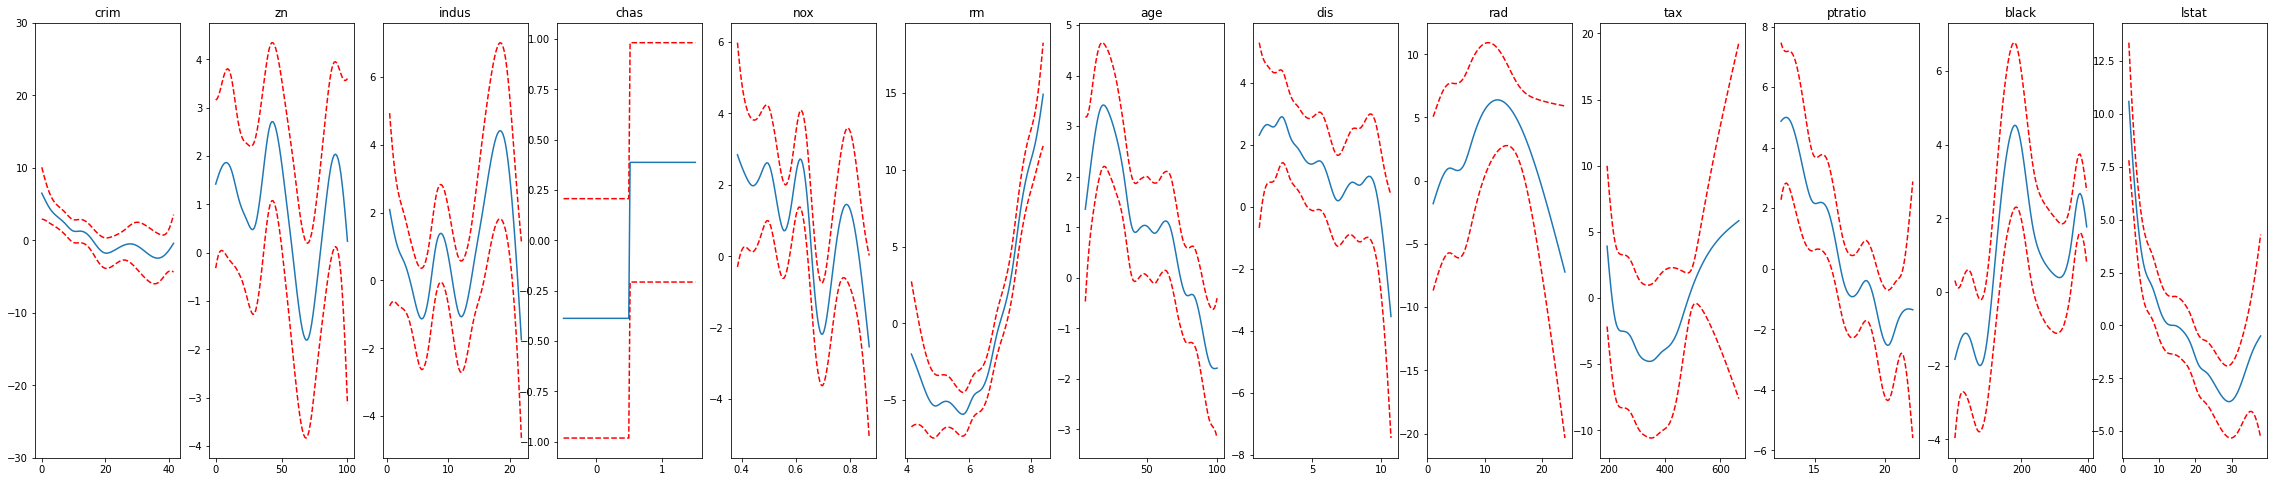

In [ ]:
titles = X_train.columns
plt.figure()
fig, axs = plt.subplots(1,13,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

# Grid Search for lambda

In [ ]:
# lams = np.random.rand(100, 13)
# lams = lams * 13 - 3
# lams = np.exp(lams)
# print(lams.shape)

In [ ]:
# np.logspace(-3,3,11)

In [ ]:
lams = np.array([np.random.choice([0],13),np.random.choice([5],13),np.random.choice([10],13),np.random.choice([15],13),np.random.choice([20],13),np.random.choice([25],13),\
               np.random.choice([30],13),np.random.choice([35],13),np.random.choice([40],13),np.random.choice([45],13),np.random.choice([50],13),np.random.choice([55],13)\
                ,np.random.choice([60],13),np.random.choice([65],13)])

In [ ]:
lams

array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5],
       [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10],
       [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15],
       [20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
       [25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25],
       [30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30],
       [35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35, 35],
       [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40],
       [45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45],
       [50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50],
       [55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55],
       [60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60, 60],
       [65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65, 65]])

In [ ]:
gam = LinearGAM(s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12))\
.gridsearch(X_train.values, y_train.values, lam=lams, return_scores = True)

100% (14 of 14) |########################| Elapsed Time: 0:00:02 Time:  0:00:02


In [ ]:
gam

OrderedDict([(LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
                 max_iter=100, scale=None, 
                 terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
                 tol=0.0001, verbose=False), 38.25775666289205),
             (LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
                 max_iter=100, scale=None, 
                 terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
                 tol=0.0001, verbose=False), 9.168557791125021),
             (LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
                 max_iter=100, scale=None, 
                 terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
                 tol=0.0001, verbose=False), 9.115245207977729),
             (LinearGAM(callbacks=[Deviance(), Diffs()]

In [ ]:
gam = LinearGAM(s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12), lam = 65)
gam.fit(X_train,y_train)

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + f(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10) + s(11) + s(12) + intercept,
   tol=0.0001, verbose=False)

In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     38.5633
Link Function:                     IdentityLink Log Likelihood:                                  -964.8801
Number of Samples:                          327 AIC:                                             2008.8866
                                                AICc:                                             2020.092
                                                GCV:                                                9.0765
                                                Scale:                                              7.1727
                                                Pseudo R-Squared:                                   0.9089
Feature Function                  Lam

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 

  """Entry point for launching an IPython kernel.


In [ ]:
((gam.predict(X_test) - y_test) ** 2).mean()

9.864568041729118

<Figure size 432x288 with 0 Axes>

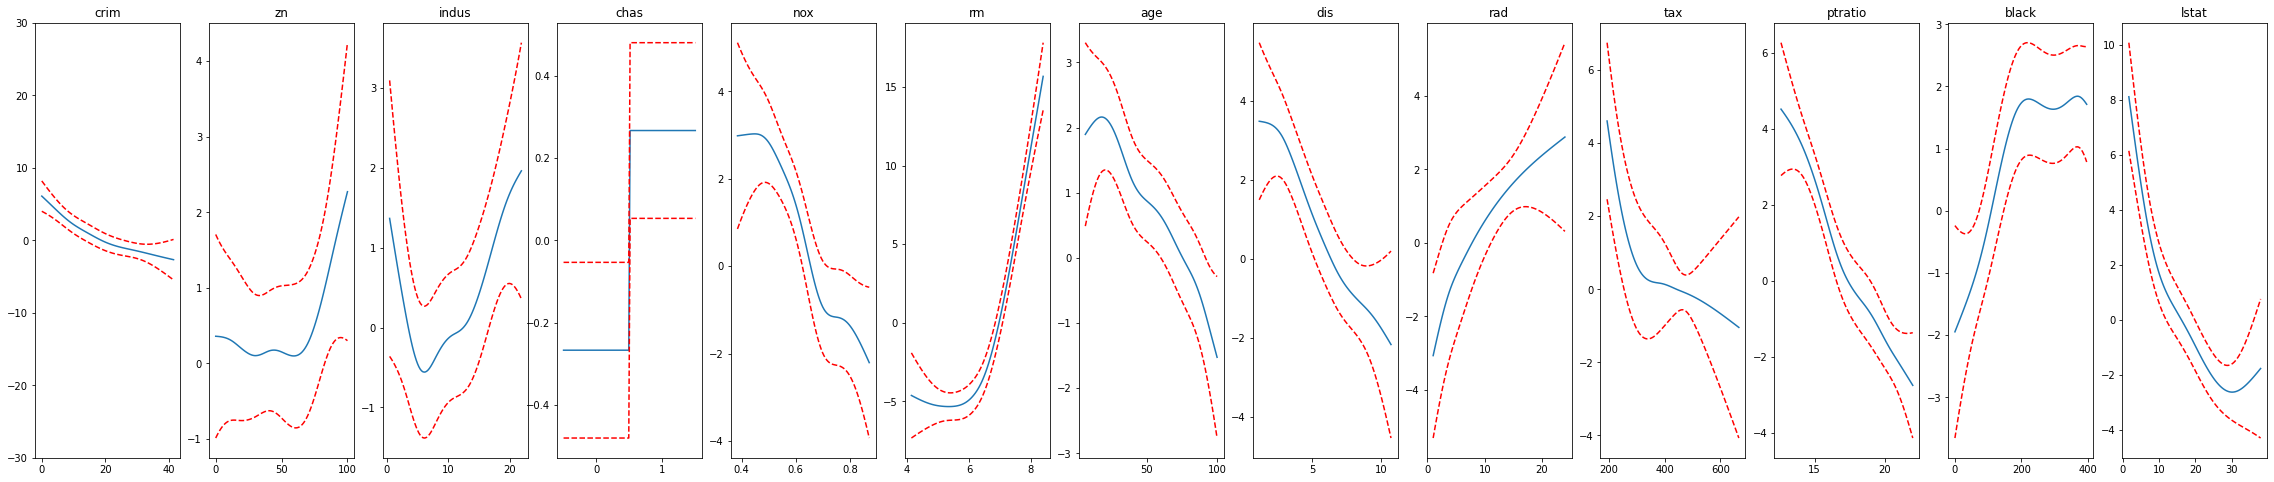

In [ ]:
titles = X_train.columns
plt.figure()
fig, axs = plt.subplots(1,13,figsize=(40, 8))
for i, ax in enumerate(axs):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:, i], gam.partial_dependence(term=i, X=XX,   width=.95)[1], c='r', ls='--')
    if i == 0:
        ax.set_ylim(-30,30)
    ax.set_title(titles[i])

# Splines with feature selection is pending